<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/10_intro_to_unsupervised_learning_with_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Intro to Unsupervised Learning - K-Means Clustering

K-Means clustering is a type of unsupervised learning algorithms. In unsupervised learning, the machine learning model do not get the labels during training. It instead has to figure out the labels itself. It's like learning without instructions. It's like a teacher telling you, "hey, here are 1000 exercises to use while preparing for a test, the test will be only 5 questions from all of those exercises." That can feel like a struggle, you will do all you can to narrow down these 100 exercises to 5. Some questions may be similar, or may be solved by one method, etc..the goal will merely be to narrow down the exercises, while maximizing the chance of passing the test. 

That type of example can be compared to clustering. The model is given bunch of data (lacking labels) and the job of the model is to find the labels that can be present according to the supplied data. 


K-Means Clustering require the number of clusters to be specified before training. The way this type of algorithm works is beyond the scope of this notebook but here are 3 main steps of how such algorithm work: 

* K-Means will randomly assigns samples of data to initial centroids of all clusters. This step is called initialization. A centroid is also referred to as a cluster center and it is the mean of all the sample of data in a cluster. 

* It then reassigns the samples to the nearest centroids.
* It also find the new centroids of all clusters by taking the mean value of all of the samples assigned to each previous centroids. 

The last two steps are repeated until the stopping criterion is fulfilled or when difference between the old and new centroids is constant. 

Unspervised learning has got its applications in areas such as grouping web search results, customer segmentation, news aggregation and more. 

## KMeans Clustering

### Contents

* [1 - Imports](#1)
* [2 - Loading the data](#2)
* [3 - Exploratory Analysis](#3)
* [4 - Preprocessing the data](#4)
* [5 - Trainin K-Means Clustering to Find Clusters](#5)
* [6 - Evaluating K-Means Clustering](#6)
* [7 - Final Notes](#7)

<a name='1'></a>
## 1 - Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

<a name='2'></a>

## 2 - Loading the data

In this notebook, we will use a different dataset. Up to this point creating these notebooks, my goal has been to look on the other side, to try something new, to try new a dataset. If you have went through some notebooks about other algorithms, no doubt that you have learned something new or perhaps nothing new but you experienced a new dataset. 

In this notebook, we will use a mushroom dataset. The dataset describes mushrooms in terms of their physical characteristics and they are classified into: poisonous or edible.

The dataset also includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like `leaflets three, let it be for Poisonous Oak and Ivy.`

The dataset contains the labels (edibility) but for the purpose of doing clustering, we will remove the labels. 

In [3]:
# Let's firs hide warnings just in case

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import fetch_openml

mushroom_data = fetch_openml(name='mushroom', version=1)

In [5]:
mushroom_data.data.shape

(8124, 22)

As you can see above, there are 8124 examples and 22 features. 

In [6]:
# Description of the data 
print(mushroom_data.DESCR)

**Author**: [Jeff Schlimmer](Jeffrey.Schlimmer@a.gp.cs.cmu.edu)  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/mushroom) - 1981     
**Please cite**:  The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf 


### Description

This dataset describes mushrooms in terms of their physical characteristics. They are classified into: poisonous or edible.

### Source
```
(a) Origin: 
Mushroom records are drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf 

(b) Donor: 
Jeff Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)
```

### Dataset description

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the

In [7]:
# Displaying feature names

mushroom_data.feature_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises%3F',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [8]:
# Displaying target name

mushroom_data.target_names

['class']

In [9]:
# Getting the whole dataframe

mushroom_data = mushroom_data.frame

<a name='3'></a>
## 3 - Exploratory Data Analysis


### Taking a quick look into the dataset

In [10]:
mushroom_data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [11]:
# Displaying the last rows 

mushroom_data.tail()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p
8123,x,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,o,c,l,e


In [12]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises%3F                8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

All features are categorical. So we will make sure to handle them. 

### Checking Summary Statistics

In [13]:
# Summary stats

mushroom_data.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


### Checking Missing Values

In [14]:
# Checking missing values

mushroom_data.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

It seems that we have missing values in the feature `stalk-root`. 

Usually there are three things to do with if them if they are present:
* We can remove all missing values completely
* We can leave them as they are or
* We can fill them with a given strategy such as mean, media or most frequent value. Either `Sklearn` or Pandas provides a quick ways to fill these kind of values. 

We will handle that during the data preprocessing.

### More Data Exploration

Before preprocessing the data, let's take a look into specific features. 

I want to also make note that I do not know alot about mushrooms. I thought that it would be interesting to use this real world datasets, and perhaps some people who will come across this may some of mushroom samples and their characteristics. 

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

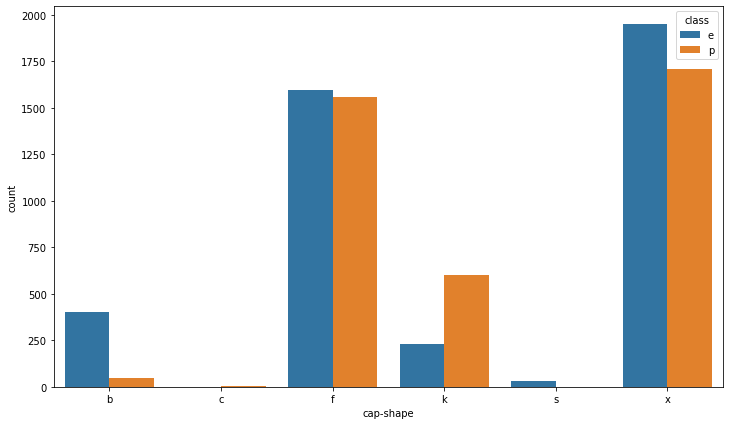

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(data=mushroom_data, x='cap-shape', hue='class')

In cap_shape, the letters stands for: `ell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s`. It seems that the convex type is dominant and most of it are edible. 

<AxesSubplot:xlabel='cap-color', ylabel='count'>

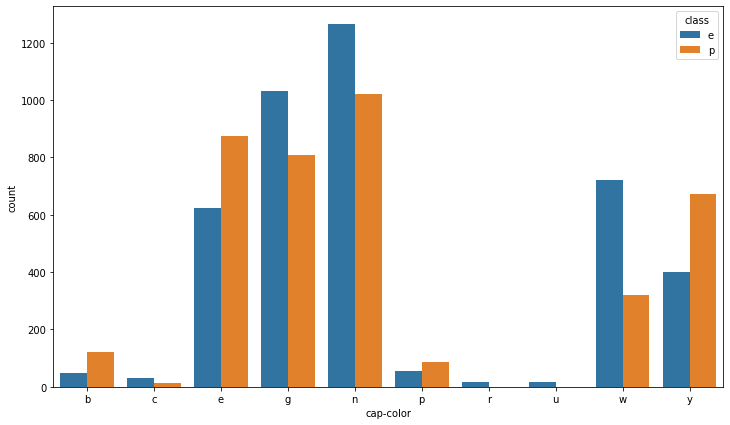

In [16]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='cap-color', hue='class')

The above is the cap color. The alphabets stands for `brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y `. 

Also it seems that most caps are brown(n), either edible or brown.

<AxesSubplot:xlabel='population', ylabel='count'>

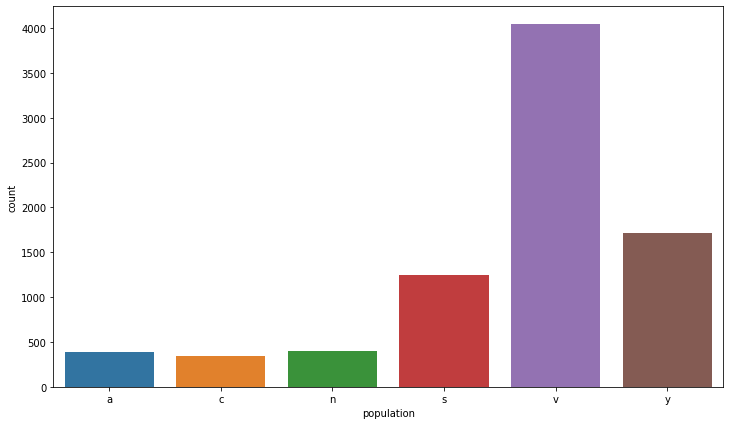

In [17]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='population')

The most populations are most several. Here are what the letters stand for: `abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y`.  

<AxesSubplot:xlabel='habitat', ylabel='count'>

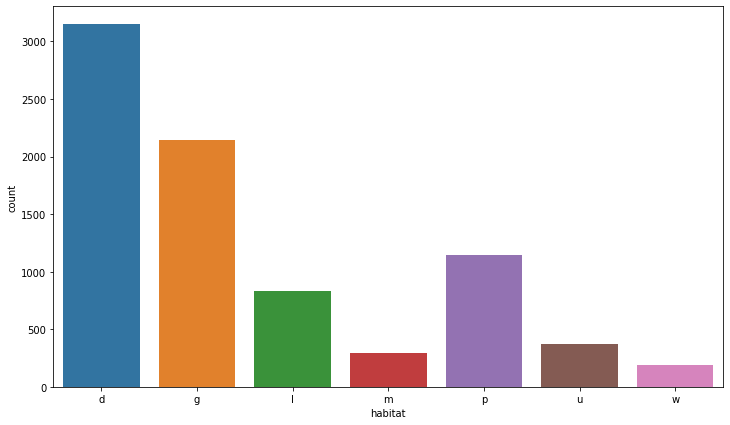

In [18]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='habitat')

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

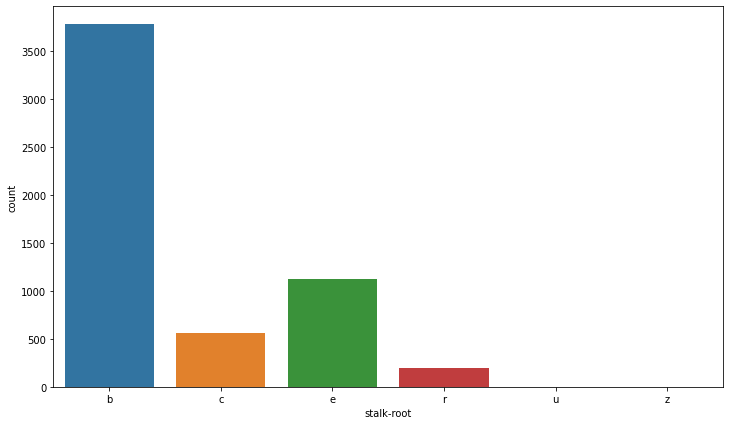

In [19]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='stalk-root')

Above is the feature that is missing values. We will remove all missing values. Since the missing values are of one category, we will drop it to avoid adding noise in the dataset. 

And finally, we can look in the class feature. There are two categories, `e(edible)` and `p(poisonous)`. 

<AxesSubplot:xlabel='class', ylabel='count'>

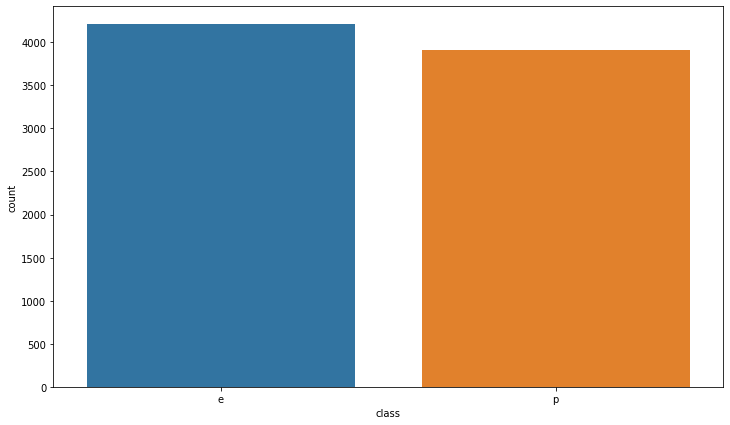

In [25]:
plt.figure(figsize=(12,7))

sns.countplot(data=mushroom_data, x='class')

<a name='4'></a>

## 4 - Data Preprocessing 


Let's remove the missing values first. 

In [20]:
mushroom_df = mushroom_data.dropna()

For the purpose of performing clustering, we will remove the labels. 

In [21]:
mushroom = mushroom_df.drop('class', axis=1)
mushroom_labels = mushroom_df['class']

Let's now convert all categorical features into the numerics.

In [22]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

mushroom_prepared = encoder.fit_transform(mushroom)

In [23]:
mushroom_prepared

array([[5., 2., 4., ..., 1., 3., 5.],
       [5., 2., 7., ..., 2., 2., 1.],
       [0., 2., 6., ..., 2., 2., 3.],
       ...,
       [5., 3., 3., ..., 5., 5., 4.],
       [5., 3., 1., ..., 5., 1., 0.],
       [2., 3., 1., ..., 5., 1., 0.]])

As you can see above, `mushroom_prepared` is a NumPy array. We can convert it back to the Pandas Dataframe although KMeans algorithm can accept both as input. 

In [24]:
mushroom_prep_df = pd.DataFrame(mushroom_prepared, columns=mushroom.columns)
mushroom_prep_df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,2.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
1,5.0,2.0,7.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,1.0
2,0.0,2.0,6.0,1.0,3.0,1.0,0.0,0.0,3.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,2.0,2.0,3.0
3,5.0,3.0,6.0,1.0,6.0,1.0,0.0,1.0,3.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,3.0,1.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,2.0,1.0,...,2.0,5.0,5.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0


No alphabets anymore. They were perfectly encoded or converted to numerics representation. 

We are now ready to find the labels with KMeans Clustering. Again, this is for the assumption that we do not have labels, or to make it simple, we have a data about the characteristics of different plants, but we do not know if they are edible or not. We want to use unsupervised learning to figure that out. 

<a name='5'></a>

## 5 - Training K-Means Clustering to Find Clusters

We are going to create a KMeans model from `sklearn.cluster`. We will remember to provide the number of the clusters, which is 2 in our case. 

In [26]:
from sklearn.cluster import KMeans

k_clust = KMeans(n_clusters=2, random_state=42)

k_clust.fit(mushroom_prep_df)

KMeans(n_clusters=2)

We can access the cluster centers by `model.cluster_centers_`. 

In [27]:
k_clust.cluster_centers_

array([[3.42103549e+00, 1.56756757e+00, 4.99153370e+00, 2.70270270e-01,
        2.78508629e+00, 1.00000000e+00, 2.78736568e-01, 1.09736242e-01,
        2.04265711e+00, 3.07391729e-01, 8.42722240e-01, 1.27841094e+00,
        1.31813741e+00, 3.87463367e+00, 3.87463367e+00, 0.00000000e+00,
        9.97465999e-18, 1.00651254e+00, 1.42526864e+00, 8.16020840e-01,
        3.34255943e+00, 1.72549658e+00],
       [3.41935484e+00, 1.69840653e+00, 3.41507967e+00, 9.14885348e-01,
        4.49553051e+00, 9.93004275e-01, 6.52934318e-02, 1.42635056e-01,
        5.32024874e+00, 7.52429071e-01, 3.04702682e-01, 1.92382433e+00,
        1.97901283e+00, 4.03925379e+00, 4.00194326e+00, 0.00000000e+00,
        3.10921104e-03, 1.02487369e+00, 2.89739604e+00, 1.69218811e+00,
        4.15507190e+00, 6.51768364e-01]])

Also, we can get the labels that the KMeans provided for each data point. 

In [28]:
k_labels = k_clust.labels_
k_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

<a name='6'></a>

### 6 -Evaluating K-Means Clustering

In real world, evaluating the performance of KMeans is not an easy thing, because there are not true labels to compare with the clustered labels. In our case since we have them, we can find things like accuracy score, or even find the confusion matrix to display the actual and predicted classes. Not to mention classification report to find things like Recall, Precision, or F1 Score. 

But again since we are merely comparing the labels(true and clustered), we do not need that extra metrics. 

Before finding the accuracy score, I will first convert the true labels into the numbers or encode them. For simplicity, I will use a map function. 

In [36]:
map_dict = {
    
    'p':0,
    'e':1
}

mushroom_labels_prep = mushroom_labels.map(map_dict)

In [32]:
mushroom_labels_prep

0       0
1       1
2       1
3       0
4       1
       ..
7986    1
8001    1
8038    1
8095    0
8114    0
Name: class, Length: 5644, dtype: category
Categories (2, int64): [1, 0]

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(mushroom_labels_prep, k_labels)

0.673458540042523

This is not excellent, but it's so impressive. Why? Well, KMeans never saw the labels, it was only feed the data of different characteristics of poisonous and edible mushrooms and its job was to try to find patterns in the data so as to learn if a given mushroom specy is a poisonous or edible. 


KMeans algorithm is very useful in areas where you have a bunch of unlabeled data. Take an example in customer segmentation. You may want to provide different promotions to some groups of your customers but you have no clue of who would benefit from that particular promotion. So, you can try to find the group of customers using this algorithm. It will try to group similar customers according to their interests, and will likely appreciate the promotion.

The same concept can be applied to grouping the equipments that has similar defects in an industry. That was just mentioning few, there are more applications of KMeans clustering. 

<a name='7'></a>

### 7 - Final Notes

In this notebook, we learned the idea behind unsupervised learning and KMeans clustering. We also practiced that on mushroom dataset where we were interested in grouping the species that can be poisonous or edible. 

If you like mushrooms and you know some of their characteristics, no doubt that you enjoyed this notebook. Maybe pick one edible sample and make it your next meal :)

## [BACK TO TOP](#0)